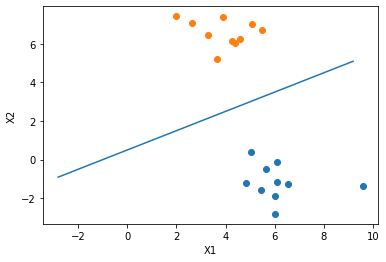

In [2]:
#(a)
import matplotlib.pyplot as plt
import numpy as np

#draw f
def draw_f(x_min, x_max):
    x = np.arange(x_min, x_max)
    y = 0.5*x + 0.5
    plt.plot(x,y)

def draw_g(x_min, x_max, w):
    x = np.arange(x_min,x_max)
    y = (-w[0]*x-w[2])/w[1]
    plt.plot(x,y)

#draw points
def generate_X(N):
    mean1 = [6,-1]
    cov1 = [[1,0],[0,1]]
    mean2 = (4,6)
    cov2 = [[1,0],[0,1]]
    X1 = np.random.multivariate_normal(mean1,cov1,N//2)
    X2 = np.random.multivariate_normal(mean2,cov1,N//2)
    return X1, X2

def draw_points(X1, X2):
    plt.scatter(X1[:,0],X1[:,1],marker='o')
    plt.scatter(X2[:,0],X2[:,1],marker='o')
    plt.xlabel("X1")
    plt.ylabel("X2")
    # plt.show()

N = 20
X1,X2 = generate_X(N)
draw_f(min(X1.min(),X2.min()), max(X1.max(), X2.max()))
draw_points(X1, X2)

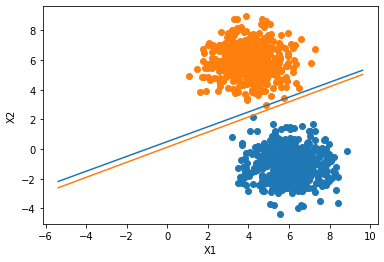

In [13]:
#(b)
 
def perceptron(X, y, learning_rate):
    m, n = X.shape
    X = np.column_stack((np.ones(m), X))
    w = np.random.random(n+1)
    w_record = []
    w_record.append(w.copy())
    while True:
        i = np.random.randint(m)
        if y[i]* w.dot(X[i,:]) <= 0:
            w = w + y[i]*X[i,:]
            w_record.append(w.copy())
            continue
        predict = sign(X,w)
        if np.all(predict==y):
            break
    return w,w_record
    
def sign(X,w):
    predict = np.dot(X,w)
    predict[predict>0] = 1
    predict[predict==0] = 0
    predict[predict<0] = -1
    return predict



X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = perceptron(X,y,0.01)

#draw_f
draw_f(X.min()-1,X.max()+1)

#draw_points
draw_points(X1,X2)

#draw g
draw_g(X.min()-1,X.max()+1, w)




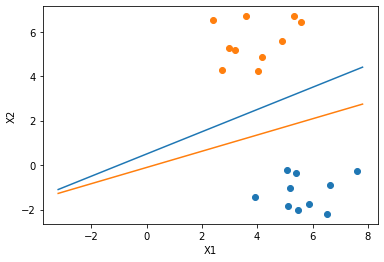

In [14]:
#(c)
N = 20
X1,X2 = generate_X(N)

X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = perceptron(X,y,0.01)

draw_f(X.min()-1, X.max()+1)

draw_points(X1,X2)

draw_g(X.min()-1, X.max()+1, w)

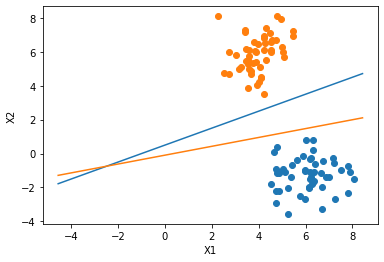

In [11]:
#(d)
N = 100
X1,X2 = generate_X(N)

X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = perceptron(X,y,0.01)

draw_f(X.min()-1, X.max()+1)

draw_points(X1,X2)

draw_g(X.min()-1, X.max()+1, w)

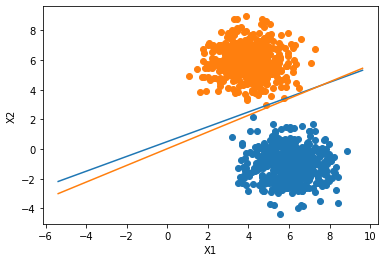

In [12]:
#(e)
N = 1000
X1,X2 = generate_X(N)
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1

w,w_record = perceptron(X,y,0.01)

draw_f(X.min()-1, X.max()+1)

draw_points(X1,X2)

draw_g(X.min()-1, X.max()+1, w)